<a href="https://www.kaggle.com/code/mykalbolden1/linearregressionneuralnetworks?scriptVersionId=181354812" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#import packages 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
import pandas as pd

%matplotlib inline

np.random.seed(3)

In [3]:
#Dataset 

m = 20

X, y = make_regression(n_samples=m, n_features=1, noise=15, random_state=1)
X = X.reshape((1, m))
y = y.reshape((1,m))

In [4]:
#Sanity Checks
print("training data", X)
print("testing data", y)

training data [[ 1.13376944 -1.09989127  0.58281521 -0.7612069  -0.24937038  1.46210794
  -0.17242821 -2.06014071 -0.52817175 -0.3224172  -2.3015387   0.86540763
   1.74481176  0.04221375  0.3190391   1.62434536 -1.07296862 -0.38405435
  -0.87785842 -0.61175641]]
testing data [[  79.99035791  -85.42396228   44.9198365   -54.33691393  -32.39556297
    85.28605355   -7.7941424  -132.69215966  -49.29378042  -23.24468236
  -156.86047186   56.61430067  133.8208063    -6.22910628    6.50300343
   129.51387602  -59.8239433   -52.65165628  -77.09713816  -59.26995358]]


Text(0, 0.5, '$y$')

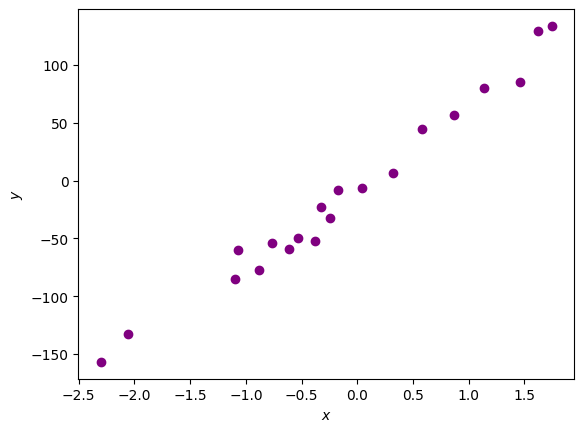

In [5]:
plt.scatter(X, y, c="purple")

plt.xlabel("$x$")
plt.ylabel("$y$")

In [6]:
def layer_size(X,y):
    
    n_x = X.shape[0]
    n_y = y.shape[0]
    
    return(n_x, n_y)

(n_x, n_y) = layer_size(X, y)

print(n_x, " ", n_y)

1   1


In [7]:
def init_params(n_x, n_y):
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    
    assert (W.shape == ((n_y, n_x)))
    assert (b.shape == (n_y, 1))
    
    
    parameters = {"W": W, 
                 "b": b}
    
    return parameters 

In [8]:
parameters = init_params(n_x, n_y)

print(parameters["W"])

[[0.01788628]]


In [9]:
def forward_propagation(X, parameters):
    
    w = parameters["W"]
    b = parameters["b"]
    
    z = np.dot(w, X) + b
    y_hat = z
    
    assert(y_hat.shape == (n_y, X.shape[1]))
    
    return y_hat 

In [10]:
y_hat = forward_propagation(X, parameters)

print(y_hat)

[[ 0.02027892 -0.01967297  0.0104244  -0.01361516 -0.00446031  0.02615168
  -0.0030841  -0.03684826 -0.00944703 -0.00576685 -0.04116598  0.01547893
   0.0312082   0.00075505  0.00570642  0.0290535  -0.01919142 -0.00686931
  -0.01570163 -0.01094205]]


In [11]:
def compute_cost(y_hat, y):
    
    m = y.shape[1]
    
    cost = np.sum((y_hat - y)**2)/(2*m)
    
    return cost

In [12]:
print("Cost = " +str(compute_cost(y_hat,y)))

Cost = 3148.663125600962


In [13]:
def nn_model(X,Y, num_iterations=10, print_cost=False):
    
    for i in range(0, num_iterations):
        y_hat = np.dot(parameters["W"], X) + parameters["b"]
        
        cost = np.sum((y_hat - Y)**2)/(2*y.shape[1])
        
        if print_cost:
            print("Cost after iteration %i: %f" %(i, cost))
            
    return parameters

In [14]:
parameters = nn_model(X, y, num_iterations=15, print_cost=True)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

Cost after iteration 0: 3148.663126
Cost after iteration 1: 3148.663126
Cost after iteration 2: 3148.663126
Cost after iteration 3: 3148.663126
Cost after iteration 4: 3148.663126
Cost after iteration 5: 3148.663126
Cost after iteration 6: 3148.663126
Cost after iteration 7: 3148.663126
Cost after iteration 8: 3148.663126
Cost after iteration 9: 3148.663126
Cost after iteration 10: 3148.663126
Cost after iteration 11: 3148.663126
Cost after iteration 12: 3148.663126
Cost after iteration 13: 3148.663126
Cost after iteration 14: 3148.663126
W = [[0.01788628]]
b = [[0.]]


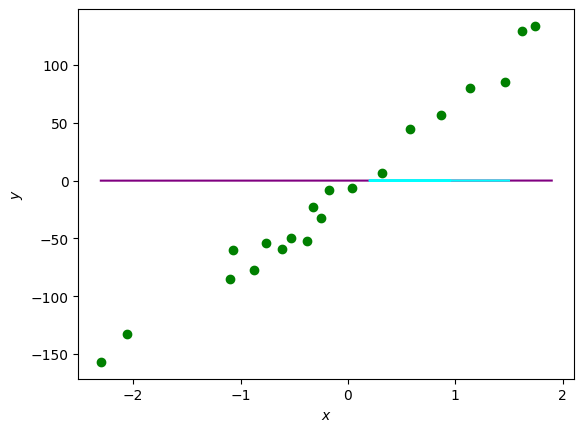

In [15]:
X_pred = np.array([0.95, 0.2, 1.5])

fig, ax = plt.subplots()
plt.scatter(X,y, color = "green")

plt.xlabel("$x$")
plt.ylabel("$y$")

x_line = np.arange(np.min(X[0,:]), np.max(X[0,:])*1.1, 0.1)
ax.plot(x_line, W_simple[0,0] * x_line + b_simple[0,0], "purple")
ax.plot(X_pred, W_simple[0,0] * X_pred + b_simple[0,0], "cyan")

plt.plot()
plt.show()

In [16]:
#Build another Neural Network from data 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.callbacks import EarlyStopping 


2024-06-03 22:58:03.436226: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 22:58:03.436440: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 22:58:03.647615: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
#X, y
print(X.shape, y.shape)
X = np.array(X)
y = np.array(y)

print(X[0])
#print(y[0])



(1, 20) (1, 20)
[ 1.13376944 -1.09989127  0.58281521 -0.7612069  -0.24937038  1.46210794
 -0.17242821 -2.06014071 -0.52817175 -0.3224172  -2.3015387   0.86540763
  1.74481176  0.04221375  0.3190391   1.62434536 -1.07296862 -0.38405435
 -0.87785842 -0.61175641]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X[0], y[0],
                                                   test_size = 0.2,
                                                   random_state= 123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train.reshape(-1,1))
X_test = min_max_scaler.transform(X_test.reshape(-1,1))


(16,) (4,) (16,) (4,)
